**IMPORTING lIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**DATA CLEANING**

In [ ]:
#droping and renaming the columns
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
data = data.rename(columns={"v1": "label", "v2": "text"})

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("no of rows",len(data))

no of rows 5572


In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [ ]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#MISSING VALUES
data.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# checking for duplicate values
data.duplicated().sum()

403

In [ ]:
# Removing duplicate values from the data
data=data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

**DATA EXPLORATION**

<Axes: xlabel='label', ylabel='count'>

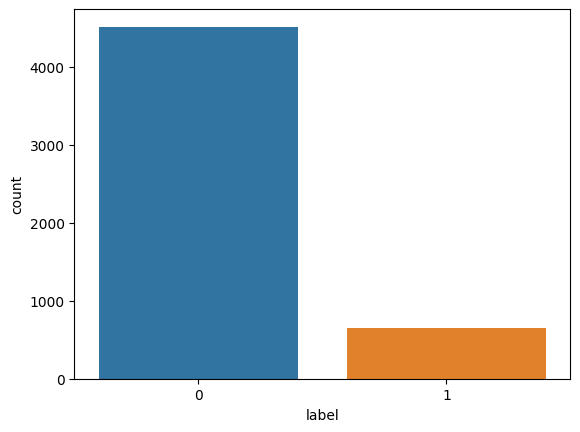

In [ ]:
sns.countplot(x='label', data=data)

In [ ]:
#creating a new column for number of characters or length
data["no_of_characters"]=data["text"].apply(len)
data.head()

,label,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#creating a new column for number of words
data["no_of_words"] = data["text"].apply(lambda x: len(nltk.word_tokenize(str(x))))
data.head()

,label,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#creating a new column for number of sentences
data["no_of_sentences"] = data["text"].apply(lambda x: len(nltk.sent_tokenize(str(x))))
data.head()

,label,text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,label,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
#describing the ham
data[data["label"]==0][["no_of_characters",	"no_of_words",	"no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing the spam
data[data["label"]==1][["no_of_characters",	"no_of_words",	"no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_characters', ylabel='Count'>

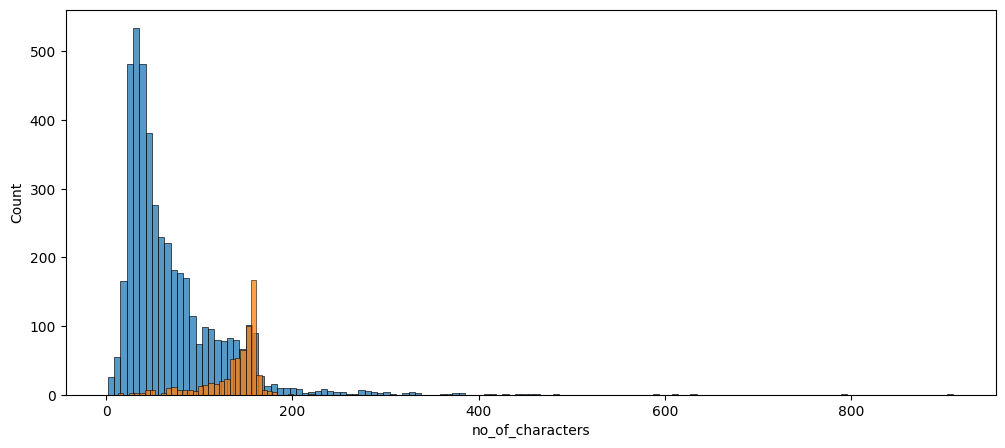

In [ ]:
#ploting histogram for characters
plt.figure(figsize=(12, 5))
sns.histplot(data[data["label"]==0]["no_of_characters"])
sns.histplot(data[data["label"]==1]["no_of_characters"])

<Axes: xlabel='no_of_words', ylabel='Count'>

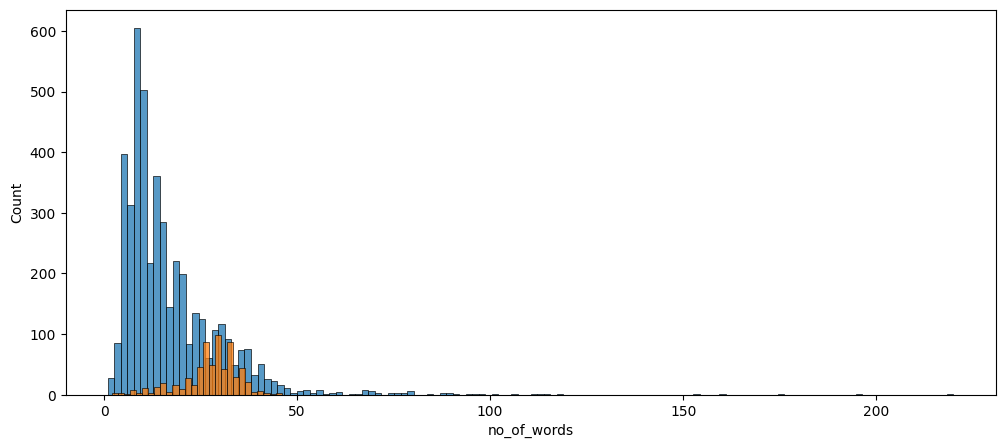

In [ ]:
#ploting histogram for words
plt.figure(figsize=(12, 5))
sns.histplot(data[data["label"]==0]["no_of_words"])
sns.histplot(data[data["label"]==1]["no_of_words"])

<Axes: xlabel='no_of_sentences', ylabel='Count'>

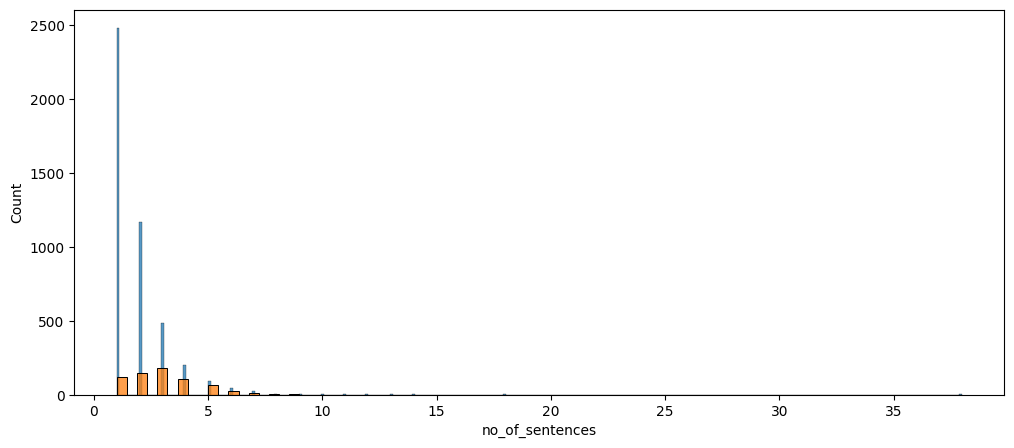

In [ ]:
#ploting histogram for sentences
plt.figure(figsize=(12, 5))
sns.histplot(data[data["label"]==0]["no_of_sentences"])
sns.histplot(data[data["label"]==1]["no_of_sentences"])

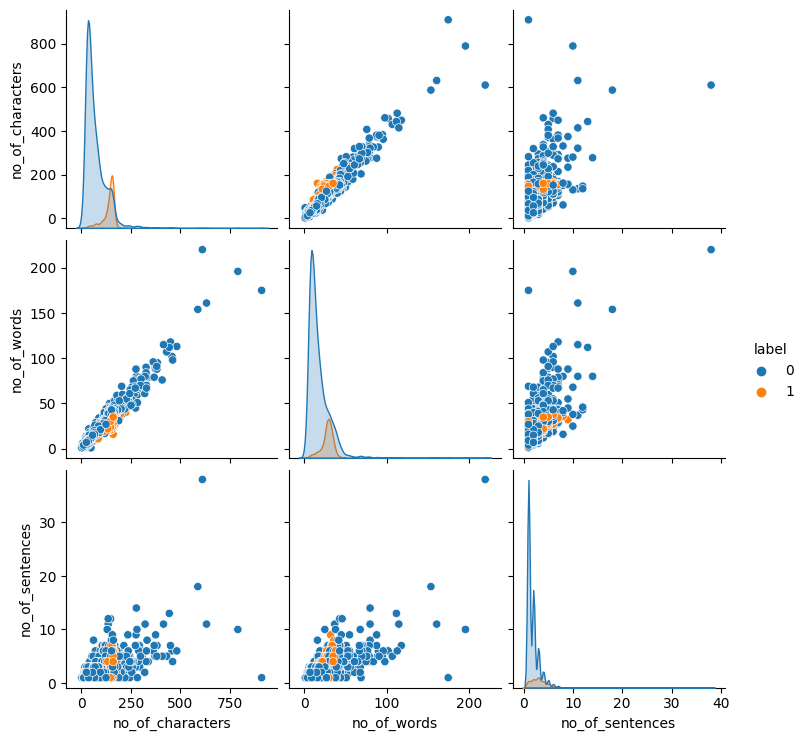

In [ ]:
#ploting a pairplot
sns.pairplot(data, hue='label')

<ipython-input-28-fd5c2e82f604>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

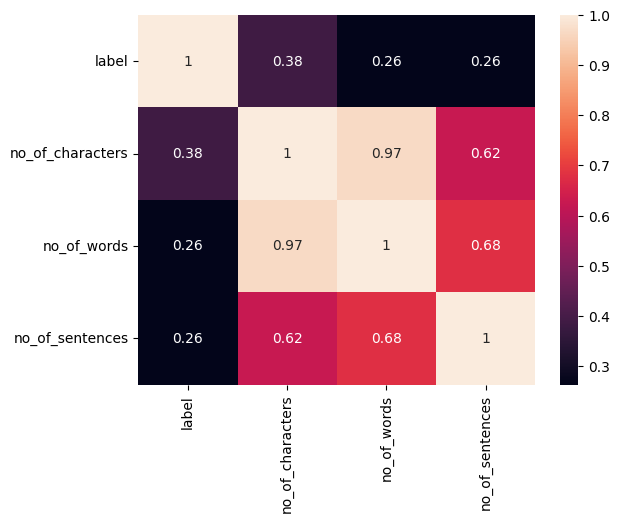

In [ ]:
#ploting a heatmap
sns.heatmap(data.corr(),annot=True)

**DATA PREPROCESSING**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [ ]:
nltk.download("stopwords")
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


transformed_text=transform_text("Hey there  it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me.")

In [ ]:
transformed_text

'hey 3 week word back like fun still tb ok std chg send rcv even brother like speak'

In [ ]:
# Adding new column as transformed_text
data["transformed_text"]=data['text'].apply(transform_text)
data.head()

,label,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
# Create a WordCloud object
wc = WordCloud(width=600, height=500, min_font_size=10, background_color="black")

In [ ]:
spam_wc = wc.generate(data[data["label"]==1]["transformed_text"].str.cat(sep=" "))

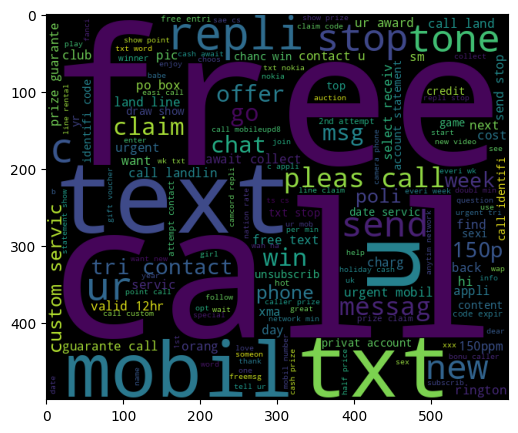

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data["label"]==0]["transformed_text"].str.cat(sep=" "))

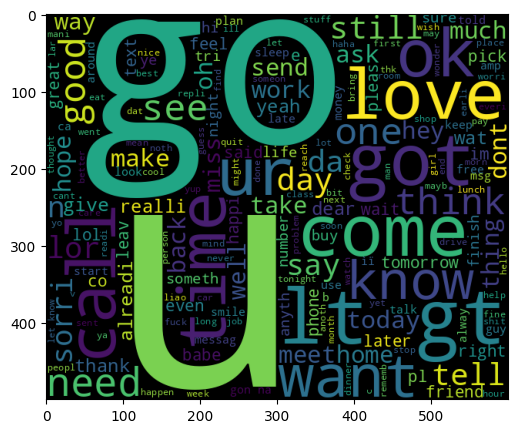

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(ham_wc)

In [ ]:
#Number of words in spam
spam=[]
for msg in data[data["label"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam.append(word)

In [ ]:
len(spam)

9939

In [ ]:
#Number of words in ham
ham=[]
for msg in data[data["label"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham.append(word)

In [ ]:
len(ham)

35404

**BUILDING THE MODEL**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection  import train_test_split
count=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['transformed_text'].values).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y=data["label"].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Implementation of Machine learning Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
model_mnb = MultinomialNB()

In [ ]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)


MultinomialNB()

In [ ]:
prediction=model_mnb.predict(x_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Accuracy score :{}'. format(accuracy_score(y_test,prediction)))
print('precision score :{}'. format(precision_score(y_test,prediction)))
print('Recall score :{}'. format(recall_score(y_test,prediction)))
print('f1 score :{}'. format(f1_score(y_test,prediction)))
print('confusion matrix:{}'. format(confusion_matrix(y_test,prediction)))


Accuracy score :0.9709864603481625
precision score :1.0
Recall score :0.782608695652174
f1 score :0.878048780487805
confusion matrix:[[896   0]
 [ 30 108]]


<Axes: >

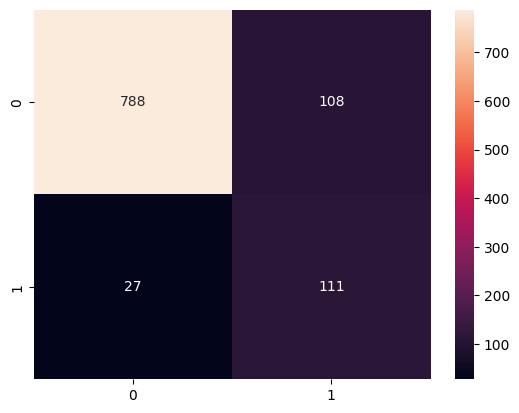

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

In [ ]:
model_gnb =GaussianNB()
model_gnb.fit(x_train, y_train)


GaussianNB()

In [ ]:
prediction=model_gnb.predict(x_test)

In [ ]:
prediction

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
print('Accuracy score :{}'. format(accuracy_score(y_test,prediction)))
print('precision score :{}'. format(precision_score(y_test,prediction)))
print('Recall score :{}'. format(recall_score(y_test,prediction)))
print('f1 score :{}'. format(f1_score(y_test,prediction)))
print('confusion matrix:{}'. format(confusion_matrix(y_test,prediction)))

Accuracy score :0.8694390715667312
precision score :0.5068493150684932
Recall score :0.8043478260869565
f1 score :0.6218487394957983
confusion matrix:[[788 108]
 [ 27 111]]


<Axes: >

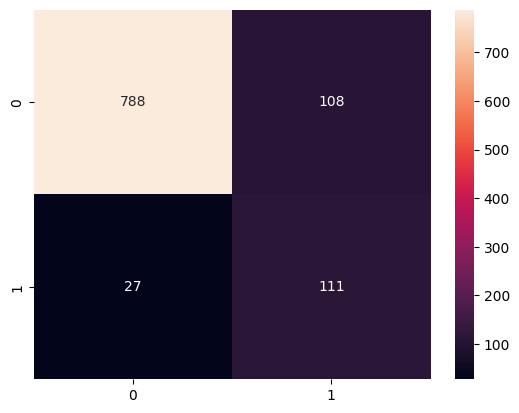

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')

In [ ]:
model_bnb=BernoulliNB()
model_bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
prediction=model_bnb.predict(x_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Accuracy score :{}'. format(accuracy_score(y_test,prediction)))
print('precision score :{}'. format(precision_score(y_test,prediction)))
print('Recall score :{}'. format(recall_score(y_test,prediction)))
print('f1 score :{}'. format(f1_score(y_test,prediction)))
print('confusion matrix:{}'. format(confusion_matrix(y_test,prediction)))

Accuracy score :0.9835589941972921
precision score :0.991869918699187
Recall score :0.8840579710144928
f1 score :0.9348659003831418
confusion matrix:[[895   1]
 [ 16 122]]


<Axes: >

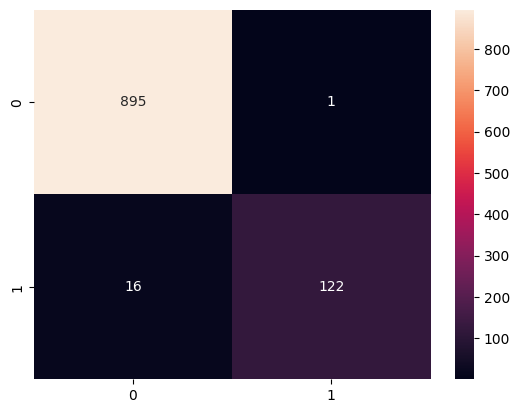

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d')